In [4]:
!pip install warn

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import chardet

In [23]:
data = 'total_booking.csv'

In [24]:
with open('total_booking.csv', 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [26]:
df = pd.read_csv(data, encoding= 'ISO-8859-1')

In [27]:
df.head()

,passengers_num,sales_chasnnels,trip_types,purchase_leads,stays_length,Total_flight_hours,flight_days,routes,booking_from,extra_baggage,preferred_seats,flight_meals,flight_duration,booking_completed
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [28]:
df.dtypes

passengers_num          int64
sales_chasnnels        object
trip_types             object
purchase_leads          int64
stays_length            int64
Total_flight_hours      int64
flight_days            object
routes                 object
booking_from           object
extra_baggage           int64
preferred_seats         int64
flight_meals            int64
flight_duration       float64
booking_completed       int64
dtype: object

In [29]:
df.shape

(50000, 14)

In [30]:
df.isnull().sum()

passengers_num        0
sales_chasnnels       0
trip_types            0
purchase_leads        0
stays_length          0
Total_flight_hours    0
flight_days           0
routes                0
booking_from          0
extra_baggage         0
preferred_seats       0
flight_meals          0
flight_duration       0
booking_completed     0
dtype: int64

In [32]:
df.booking_completed.value_counts()

0    42522
1     7478
Name: booking_completed, dtype: int64

In [33]:
X = df.drop('booking_completed', axis=1)
y = df.booking_completed


In [34]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()


X.dtypes

passengers_num          int64
sales_chasnnels         int64
trip_types              int64
purchase_leads          int64
stays_length            int64
Total_flight_hours      int64
flight_days             int64
routes                  int64
booking_from            int64
extra_baggage           int64
preferred_seats         int64
flight_meals            int64
flight_duration       float64
dtype: object

In [38]:
from sklearn.feature_selection import mutual_info_classif
mi_score = mutual_info_classif(X, y)
mi_score = pd.Series(mi_score, name="MI Score", index = X.columns)
mi_score = mi_score.sort_values(ascending=False)

In [39]:
mi_score

routes                0.050895
booking_from          0.047880
flight_duration       0.016511
stays_length          0.008815
extra_baggage         0.007853
preferred_seats       0.004459
flight_meals          0.004268
purchase_leads        0.002890
passengers_num        0.002145
sales_chasnnels       0.002089
Total_flight_hours    0.001118
trip_types            0.000226
flight_days           0.000145
Name: MI Score, dtype: float64

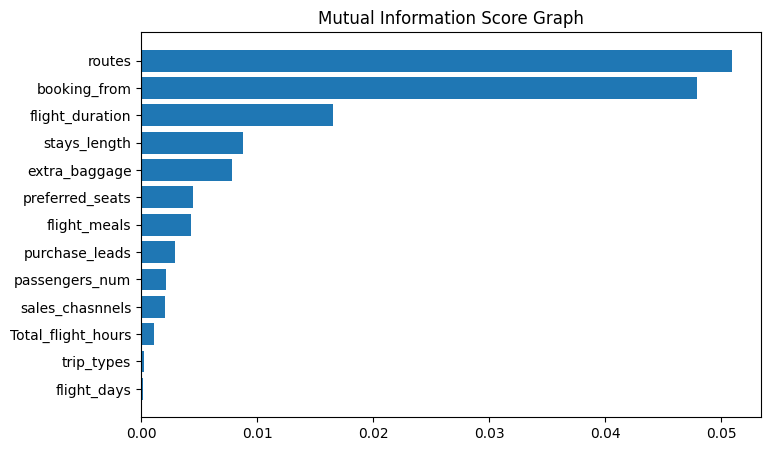

In [40]:
def plot_mi_score(score):
    score = score.sort_values(ascending=True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.barh(width, score)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Score Graph")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_score(mi_score)